# Tensor Flow2
### multi linear regression

In [2]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np

print(tf.__version__)

2.9.1


In [3]:
# train data
# t_data=2*X1 - 3*x2 + 2*x3

x_data = np.array([ [1, 2, 0], [5, 4, 3], [1, 2, -1], [3, 1, 0], [2, 4, 2], 
                    [4, 1, 2], [-1, 3, 2], [4, 3, 3], [0, 2, 6], [2, 2, 1],
                    [1, -2, -2], [0, 1, 3], [1, 1, 3], [0, 1, 4], [2, 3, 3] ])

t_data = np.array([-4, 4, -6, 3, -4, 
                   9, -7, 5, 6, 0,
                   4, 3, 5, 5, 1])

print("x_data.shape = ", x_data.shape, ", t_data.shape = ", t_data.shape)

x_data.shape =  (15, 3) , t_data.shape =  (15,)


In [4]:
# Linear Regression을 Keras 이용하여 생성

model=Sequential()
model.add(Dense(1, input_shape=(3, ),activation='linear')) # 노드 3 개인 출력층 생성

In [5]:
# 학습을 위한 optimizer, 손실함수 loss 정의
model.compile(optimizer=SGD(learning_rate=1e-2), loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 4         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [6]:
from datetime import datetime

start_time=datetime.now()
hist=model.fit(x_data, t_data, epochs=1000)
end_time=datetime.now()
print('\nElapsed Time => ', end_time - start_time)

Epoch 1/1000
1/1 [==============================] - 1s 766ms/step - loss: 22.9271
Epoch 2/1000
1/1 [==============================] - 0s 8ms/step - loss: 20.5779
Epoch 3/1000
1/1 [==============================] - 0s 15ms/step - loss: 18.9536
Epoch 4/1000
1/1 [==============================] - 0s 12ms/step - loss: 17.7125
Epoch 5/1000
1/1 [==============================] - 0s 12ms/step - loss: 16.6845
Epoch 6/1000
1/1 [==============================] - 0s 13ms/step - loss: 15.7840
Epoch 7/1000
1/1 [==============================] - 0s 12ms/step - loss: 14.9674
Epoch 8/1000
1/1 [==============================] - 0s 19ms/step - loss: 14.2117
Epoch 9/1000
1/1 [==============================] - 0s 6ms/step - loss: 13.5045
Epoch 10/1000
1/1 [==============================] - 0s 7ms/step - loss: 12.8387
Epoch 11/1000
1/1 [==============================] - 0s 12ms/step - loss: 12.2095
Epoch 12/1000
1/1 [==============================] - 0s 7ms/step - loss: 11.6137
Epoch 13/1000
1/1 [=========

In [7]:
# hist 타입 및 key 확인

print(type(hist))
print(hist.history.keys())

<class 'keras.callbacks.History'>
dict_keys(['loss'])


Matplotlib is building the font cache; this may take a moment.


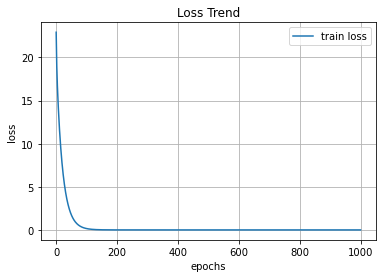

In [8]:
# 손실함수 출력

import matplotlib.pyplot as plt

plt.title('Loss Trend')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.legend(loc='best')

plt.show()

In [9]:
# 예측, ret_val = 2*x1 - 3*x2 + 2*x3

test_data=[[5,5,0],[2,3,1],[-1,0,-1],[10,5,2],[4,-1,-2]]
ret_val=[2*data[0] - 3*data[1] + 2*data[2] for data in test_data]

prediction_val = model.predict(np.array(test_data))

print(prediction_val)
print('==================')
print(ret_val)

1/1 [==============================] - 0s 95ms/step
[[-4.999698 ]
 [-3.0000815]
 [-4.0007358]
 [ 9.000861 ]
 [ 6.999554 ]]
[-5, -3, -4, 9, 7]
